<a href="https://colab.research.google.com/github/AMIN-nsri/Candy-Crush/blob/main/Fuzzy_Logic_For_Studen_Academi_Succes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuzzy Logic For Studen Academi Succes Prediction**

## **Libraries**

In [4]:
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Preprocessing and Exploration**

### **Download Dataset**

In [5]:
# Download latest version
source_path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Path to dataset files:", source_path)

# /kaggle/input/higher-education-predictors-of-student-retention/dataset.csv

Path to dataset files: /kaggle/input/higher-education-predictors-of-student-retention


### **Load Data**

In [6]:
# Optional settings for plot display
# You might need to install specific fonts if you want special characters,
# but for standard English, defaults are usually fine.
# plt.rcParams['font.family'] = 'Your Preferred Font' # e.g., 'Arial' or 'Times New Roman' if needed
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# --- Load Data ---
file_path = '/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("dataset.csv file loaded successfully.")
    print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
except FileNotFoundError:
    print(f"Error: File {file_path} not found. Please check the file path.")
    exit() # Do not continue if the file is not found

dataset.csv file loaded successfully.
Number of rows: 4424, Number of columns: 35


### **Data Description**

In [7]:
print("\n--- Display first 5 rows ---")
print(df.head())

print("\n--- DataFrame General Information (Column Types and Non-Null Values) ---")
# Pay attention to Dtype and Non-Null Count. If Non-Null Count is less than the total number of rows, it means we have missing values.
# Also, check the data types (Dtype) (object means string, int64 means integer, float64 means floating-point number).
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
# This section gives us a general overview of the value range (min, max), mean, median (50%), and dispersion (std).
print(df.describe())


--- Display first 5 rows ---
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  .

### **Missing Values**

In [8]:
# --- Check Missing Values ---
print("\n--- Checking missing values in each column ---")
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\n--> Result: No missing values found in the dataset. No cleaning needed for this part.")
else:
    print("\n--> Warning: Missing values found!")
    # A decision must be made here:
    # 1. Remove rows: df.dropna(inplace=True) (if the count is small)
    # 2. Fill with mean/median/mode: df['column_name'].fillna(df['column_name'].median(), inplace=True)
    # For now, since we don't have missing values, we take no action.

# --- Check and Convert Data Types (If Necessary) ---
print("\n--- Checking Data Types ---")
print("Based on the df.info() output, the column data types seem appropriate (mostly int or float).")
# If a column needed conversion, e.g., from object to number:
# try:
#     df['suspicious_column_name'] = pd.to_numeric(df['suspicious_column_name'], errors='coerce')
#     # errors='coerce' will turn non-convertible values into NaN
#     # Then NaNs can be handled (e.g., removal or imputation)
#     # df.dropna(subset=['suspicious_column_name'], inplace=True)
# except KeyError:
#     print("Suspicious column for type conversion does not exist.")


--- Checking missing values in each column ---
Columns with missing values:
Series([], dtype: int64)

--> Result: No missing values found in the dataset. No cleaning needed for this part.

--- Checking Data Types ---
Based on the df.info() output, the column data types seem appropriate (mostly int or float).


### **Target Variable Distribution**

In [9]:
# --- Check Target Variable Distribution ---
print("\n--- Distribution of Target Variable Classes ---")
target_distribution = df['Target'].value_counts()
print(target_distribution)

print("\n--- Percentage Distribution of Target Classes ---")
print(df['Target'].value_counts(normalize=True) * 100)
# Note the proportions. If one class is much less frequent than others, we have imbalance.
# This imbalance can affect the model's performance and evaluation.


--- Distribution of Target Variable Classes ---
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

--- Percentage Distribution of Target Classes ---
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


### **Data Visualization (EDA)**


--- Starting Data Visualization (EDA) ---


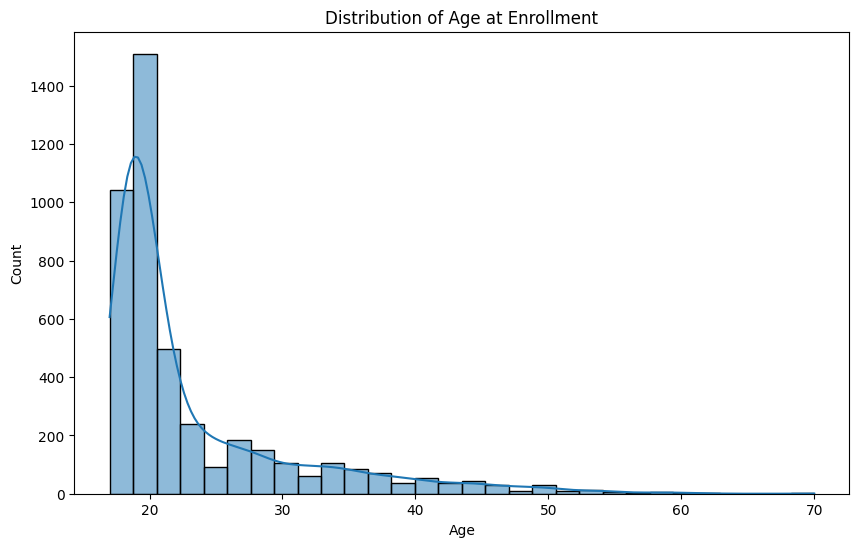

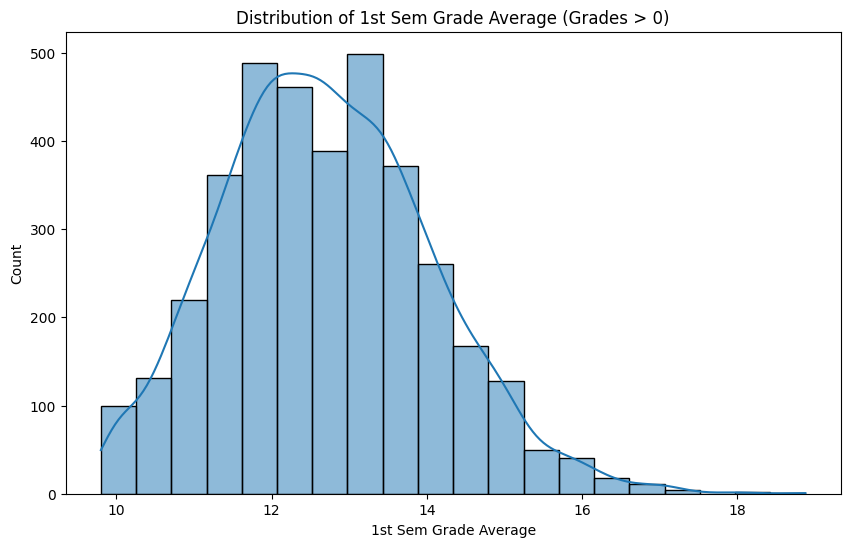

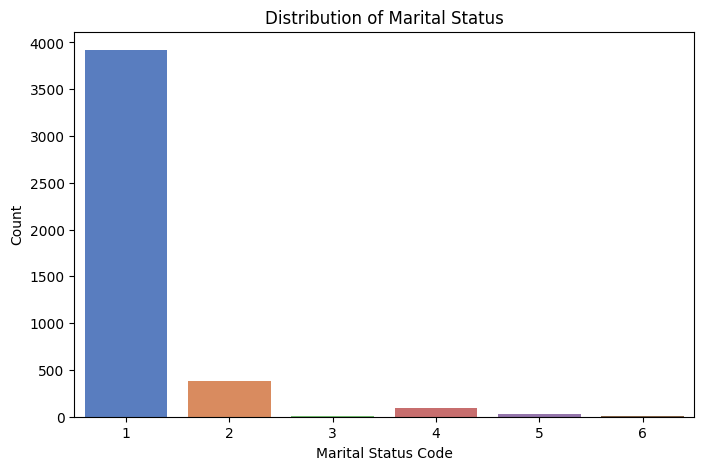

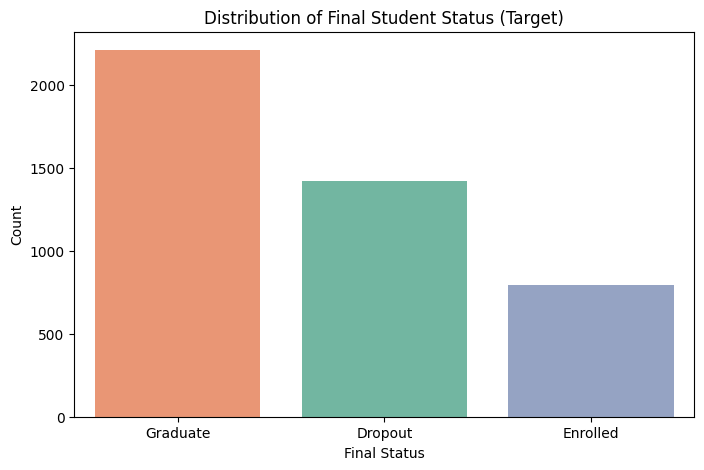

--- End of Data Visualization ---


In [10]:
# --- Data Visualization (Part of EDA) ---
print("\n--- Starting Data Visualization (EDA) ---")

# 1. Distribution of Age at Enrollment (Continuous Feature)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age at enrollment', kde=True, bins=30)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Distribution of 1st Semester Grade Average (Continuous Feature)
# Grades of 0 might have a special meaning (e.g., course not taken or grade not registered)
# We can filter them out or investigate further. For now, we filter.
grades_sem1_valid = df[df['Curricular units 1st sem (grade)'] > 0]['Curricular units 1st sem (grade)']
if not grades_sem1_valid.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(grades_sem1_valid, kde=True, bins=20)
    plt.title('Distribution of 1st Sem Grade Average (Grades > 0)')
    plt.xlabel('1st Sem Grade Average')
    plt.ylabel('Count')
    plt.show()
else:
    print("No valid data (greater than zero) found for 1st semester grades to plot histogram.")

# 3. Count Plot for Marital Status (Categorical Feature)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital status', palette='muted', hue='Marital status', legend=False)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status Code')
plt.ylabel('Count')
# If you know the meaning of the codes, you can add labels:
# plt.xticks(ticks=[...], labels=[...])
plt.show()

# 4. Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Target', palette='Set2', order=df['Target'].value_counts().index, hue='Target', legend=False) # Order by frequency
plt.title('Distribution of Final Student Status (Target)')
plt.xlabel('Final Status')
plt.ylabel('Count')
plt.show()

print("--- End of Data Visualization ---")

### **Train/Test Split**

In [11]:
# --- Separate Features (X) and Target (y) ---
print("\n--- Separating Features and Target Variable ---")
if 'Target' in df.columns:
    X = df.drop('Target', axis=1) # All columns except Target
    y = df['Target']               # Only the Target column
    print(f"Features (X) separated with shape {X.shape}.")
    print(f"Target (y) separated with shape {y.shape}.")
else:
    print("Error: 'Target' column not found in DataFrame.")
    exit()

# --- Split Data into Training and Testing Sets ---
print("\n--- Splitting data into Training (80%) and Testing (20%) sets ---")
# stratify=y is important to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

print("\n--- Checking target class distribution in the training set ---")
print(y_train.value_counts(normalize=True) * 100)
print("\n--- Checking target class distribution in the testing set ---")
print(y_test.value_counts(normalize=True) * 100)
print("--> Percentage distribution of classes should be very similar in both sets.")

# Save the split data for later stages (optional)
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False, header=True)
# y_test.to_csv('y_test.csv', index=False, header=True)
# print("\nTraining and testing data saved.")


--- Separating Features and Target Variable ---
Features (X) separated with shape (4424, 34).
Target (y) separated with shape (4424,).

--- Splitting data into Training (80%) and Testing (20%) sets ---
Number of training samples: 3539
Number of testing samples: 885

--- Checking target class distribution in the training set ---
Target
Graduate    49.929359
Dropout     32.127720
Enrolled    17.942922
Name: proportion, dtype: float64

--- Checking target class distribution in the testing set ---
Target
Graduate    49.943503
Dropout     32.090395
Enrolled    17.966102
Name: proportion, dtype: float64
--> Percentage distribution of classes should be very similar in both sets.


### **Remove Outliers**

In [12]:
def winsorize_outliers(X_train, X_test, numerical_cols, limit_percentile=0.01):
    """
    Handles outliers in specified numerical columns using Winsorization (percentile-based capping).
    Calculates limits based on the training data and applies them to both
    training and testing data.

    Args:
        X_train (pd.DataFrame): Training features DataFrame.
        X_test (pd.DataFrame): Testing features DataFrame.
        numerical_cols (list): List of numerical column names in X_train to process.
        limit_percentile (float, optional): The percentile to use for capping at each tail.
                                            Defaults to 0.01 (i.e., cap at 1st and 99th percentiles).

    Returns:
        tuple: A tuple containing (X_train_processed, X_test_processed), the DataFrames
               with outliers capped according to the training data's distribution.
    """
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()
    lower_limit_perc = limit_percentile * 100
    upper_limit_perc = 100 - (limit_percentile * 100)

    print(f"\n--- Starting Outlier Handling with Winsorization (Limit Percentile: {limit_percentile*100:.1f}%) ---")
    print(f"   (Bounds calculated from Training Data only)")

    total_train_changed = 0
    total_test_changed = 0

    for col in numerical_cols:
        # Ensure the column exists and is numeric in the training data
        if col in X_train_processed.columns and pd.api.types.is_numeric_dtype(X_train_processed[col]):
            print(f"Processing column: '{col}'")

            # 1. Calculate lower and upper bounds from *training* data percentiles
            lower_bound = np.percentile(X_train_processed[col].dropna(), lower_limit_perc)
            upper_bound = np.percentile(X_train_processed[col].dropna(), upper_limit_perc)

            # Skip if bounds are identical (e.g., constant column)
            if lower_bound == upper_bound:
                print(f"  Bounds are identical ({lower_bound:.2f}). No capping needed for '{col}'.")
                continue

            print(f"  Bounds for '{col}': [{lower_bound:.2f}, {upper_bound:.2f}]")

            # 2. Apply limits (cap) to the *training* data
            original_train_col = X_train_processed[col].copy() # For counting changes
            X_train_processed.loc[:, col] = np.clip(X_train_processed[col], lower_bound, upper_bound)
            train_changed_count = (original_train_col != X_train_processed[col]).sum()
            if train_changed_count > 0:
                print(f"  Capped {train_changed_count} values in training data for '{col}'.")
                total_train_changed += train_changed_count

            # 3. Apply the *same* limits to the *testing* data
            if col in X_test_processed.columns:
                # Check if test column is also numeric before clipping
                if pd.api.types.is_numeric_dtype(X_test_processed[col]):
                    original_test_col = X_test_processed[col].copy() # For counting changes
                    X_test_processed.loc[:, col] = np.clip(X_test_processed[col], lower_bound, upper_bound)
                    test_changed_count = (original_test_col != X_test_processed[col]).sum()
                    if test_changed_count > 0:
                        print(f"  Capped {test_changed_count} values in testing data for '{col}'.")
                        total_test_changed += test_changed_count
                else:
                    print(f"  Warning: Column '{col}' is not numeric in test data. Skipping test capping.")
            # else: # Optional: report if column not in test set
                # print(f"  Column '{col}' not found in test data.")

        else:
            if col in X_train_processed.columns: # Check if it exists but isn't numeric
                 print(f"  Skipping non-numeric column in training data: '{col}'")
            # If the column name itself wasn't even in numerical_cols for train, we wouldn't reach here.
            # But good practice to handle cases where the col might somehow not be in train df anymore.
            # else:
            #    print(f"  Column '{col}' not found in training data.")


    print("\n--- Finished Outlier Handling (Winsorization) ---")
    print(f"Total values capped in Training set: {total_train_changed}")
    print(f"Total values capped in Testing set: {total_test_changed}")

    return X_train_processed, X_test_processed

# --- How to use ---

# 1. Load the original dataset

# 2. Separate features (X) and target (y)

# 3. Split into training and testing sets

print(f"\nInitial training set size: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Initial test set size: X_test={X_test.shape}, y_test={y_test.shape}")

# 4. Define numerical columns to check (can be the same list as before)
numerical_cols_to_check = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)'
]

# --- Display descriptive statistics before (Optional) ---
print("\n--- Descriptive statistics of numerical columns *before* Winsorization (Training Data) ---")
# Only show stats for columns that actually exist in X_train
cols_in_train = [col for col in numerical_cols_to_check if col in X_train.columns]
print(X_train[cols_in_train].describe())

# 5. Call the function to process both training and testing data
#    Use a specific percentile if desired, e.g., limit_percentile=0.05 for 5th/95th
X_train_processed, X_test_processed = winsorize_outliers(X_train, X_test, numerical_cols_to_check, limit_percentile=0.01)

# --- Display descriptive statistics after (Optional) ---
print("\n--- Descriptive statistics of numerical columns *after* Winsorization (Processed Training Data) ---")
# Only show stats for columns that actually exist in X_train_processed
cols_in_train_proc = [col for col in numerical_cols_to_check if col in X_train_processed.columns]
print(X_train_processed[cols_in_train_proc].describe())


# Now you can use X_train_processed and X_test_processed for model training and evaluation.
# The shapes remain the same as the original X_train and X_test.
print(f"\nProcessed training set size: X_train={X_train_processed.shape}")
print(f"Processed test set size: X_test={X_test_processed.shape}")

# Example: If you want to overwrite the original variables:
X_train = X_train_processed
# X_test = X_test_processed


Initial training set size: X_train=(3539, 34), y_train=(3539,)
Initial test set size: X_test=(885, 34), y_test=(885,)

--- Descriptive statistics of numerical columns *before* Winsorization (Training Data) ---
       Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
count                       3539.000000                       3539.000000   
mean                          10.622981                         10.204514   
std                            4.871221                          5.235607   
min                            0.000000                          0.000000   
25%                           11.000000                         10.775000   
50%                           12.320000                         12.200000   
75%                           13.399000                         13.333333   
max                           18.875000                         18.571429   

       Unemployment rate  Inflation rate          GDP  Age at enrollment  \
count        3539.0

### **Feature Selection**


Initial training set size: X_train=(3539, 34), y_train=(3539,)
Initial test set size: X_test=(885, 34), y_test=(885,)

--- Starting Feature Selection using Filter Methods ---

--- 1. Correlation Analysis (Threshold > 0.95) ---
Identifying pairs with absolute correlation higher than 0.95:
No highly correlated features found for removal.


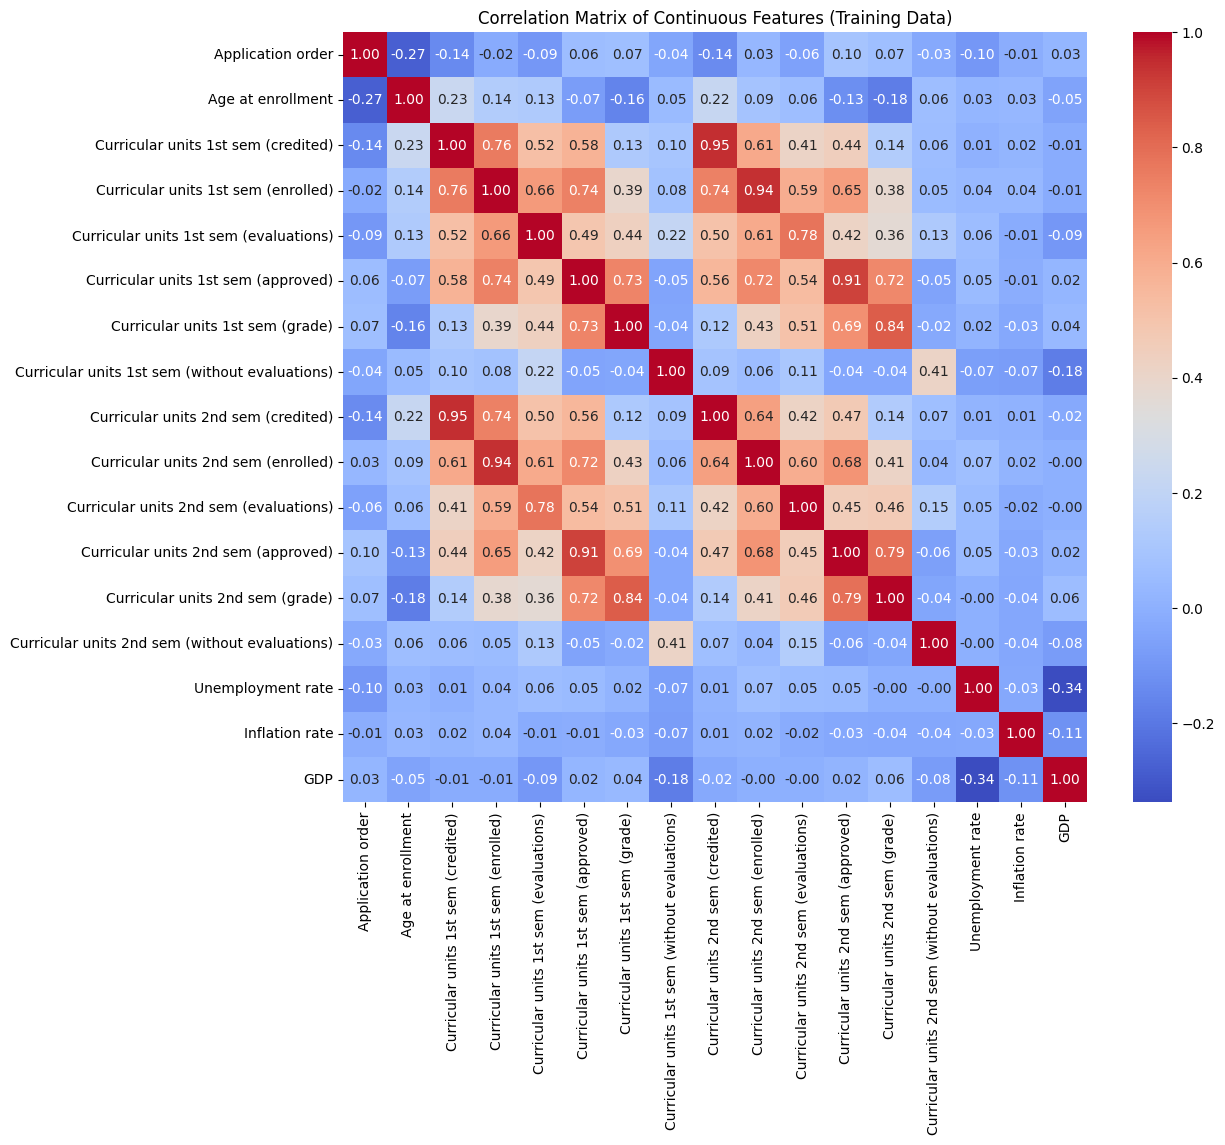


--- 2. Calculating Mutual Information (Threshold < 0.01) ---

Mutual Information (MI) score of each feature with the target (sorted - higher is better):
Curricular units 2nd sem (approved)               0.313575
Curricular units 1st sem (approved)               0.245725
Curricular units 2nd sem (grade)                  0.242387
Curricular units 1st sem (grade)                  0.188999
Curricular units 2nd sem (evaluations)            0.102269
Tuition fees up to date                           0.092613
Curricular units 1st sem (evaluations)            0.083652
Age at enrollment                                 0.068386
Course                                            0.067432
Application mode                                  0.060091
Curricular units 1st sem (enrolled)               0.048952
Scholarship holder                                0.047889
Curricular units 2nd sem (enrolled)               0.037831
Mother's occupation                               0.037308
Father's occupation 

In [13]:
def select_features_filter(X_train, X_test, y_train, continuous_features, categorical_features,
                           correlation_threshold=0.95, mi_threshold=0.01):
    """
    Performs feature selection using filter methods: Correlation analysis and Mutual Information.

    Args:
        X_train (pd.DataFrame): DataFrame of training features.
        X_test (pd.DataFrame): DataFrame of testing features.
        y_train (pd.Series or pd.DataFrame): Corresponding Series or DataFrame of training labels.
        continuous_features (list): List of continuous column names.
        categorical_features (list): List of categorical column names.
        correlation_threshold (float, optional): Threshold for high correlation (absolute). Defaults to 0.95.
        mi_threshold (float, optional): Threshold for low mutual information. Defaults to 0.01.

    Returns:
        tuple: Contains:
            - X_train_selected (pd.DataFrame): Training DataFrame with selected features.
            - X_test_selected (pd.DataFrame): Testing DataFrame with selected features.
            - dropped_features (list): List of feature names that were dropped.
            - continuous_features_selected (list): Updated list of continuous features.
            - categorical_features_selected (list): Updated list of categorical features.
    """
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()
    all_dropped_features = set() # To collect all features to be dropped

    print("\n--- Starting Feature Selection using Filter Methods ---")

    # --- 1. Correlation Analysis Among Continuous Features ---
    print(f"\n--- 1. Correlation Analysis (Threshold > {correlation_threshold}) ---")
    features_to_drop_corr = set()
    # Consider only continuous columns currently present in X_train
    existing_continuous = [f for f in continuous_features if f in X_train_processed.columns]

    if not existing_continuous:
        print("No continuous features found for correlation analysis.")
    else:
        correlation_matrix = X_train_processed[existing_continuous].corr()
        columns = correlation_matrix.columns
        print(f"Identifying pairs with absolute correlation higher than {correlation_threshold}:")
        highly_correlated_pairs_info = []

        for i in range(len(columns)):
            for j in range(i): # Only check the lower triangle
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                    col_i = columns[i]
                    col_j = columns[j]
                    print(f"  - '{col_i}' and '{col_j}': {correlation_matrix.iloc[i, j]:.3f}")
                    # Choose one to drop (e.g., the second one alphabetically)
                    feature_to_drop = sorted((col_i, col_j))[1]
                    features_to_drop_corr.add(feature_to_drop)
                    highly_correlated_pairs_info.append(f"'{col_i}' vs '{col_j}' -> Drop '{feature_to_drop}'")

        if features_to_drop_corr:
            print(f"\nContinuous features identified for removal due to high correlation: {list(features_to_drop_corr)}")
            all_dropped_features.update(features_to_drop_corr)
        else:
            print("No highly correlated features found for removal.")

        # (Optional) Display heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Continuous Features (Training Data)')
        plt.show()

    # --- 2. Calculate Mutual Information (MI) Scores ---
    print(f"\n--- 2. Calculating Mutual Information (Threshold < {mi_threshold}) ---")
    features_to_drop_mi = set()

    # Ensure y_train is valid
    if y_train is None or y_train.empty:
        print("y_train is invalid. Skipping MI calculation.")
    elif X_train_processed.empty:
         print("X_train is empty. Skipping MI calculation.")
    else:
        # Encode y_train if it's categorical
        if not pd.api.types.is_numeric_dtype(y_train):
             y_train_encoded, _ = pd.factorize(y_train)
        else:
             y_train_encoded = y_train.values # If already numeric

        # Determine which features are discrete (categorical)
        current_cols = X_train_processed.columns
        # Ensure categorical_features only contains existing columns
        valid_categorical = [f for f in categorical_features if f in current_cols]
        is_discrete = [col in valid_categorical for col in current_cols]

        # Calculate MI scores
        try:
            # Ensure no NaNs before calculation (should be handled in previous steps)
            if X_train_processed.isnull().any().any():
                 print("  Warning: NaN values found in X_train. Please handle them before MI calculation.")
                 # Options: stop, or impute (e.g., with 0 or mean - use caution)
                 # X_train_processed.fillna(0, inplace=True) # Example: fill with 0

            mi_scores = mutual_info_classif(X_train_processed, y_train_encoded,
                                            discrete_features=is_discrete, random_state=42)
            mi_scores_series = pd.Series(mi_scores, index=current_cols).sort_values(ascending=False)

            print("\nMutual Information (MI) score of each feature with the target (sorted - higher is better):")
            print(mi_scores_series)

            # Identify features with low MI score
            low_mi_features = mi_scores_series[mi_scores_series < mi_threshold]
            if not low_mi_features.empty:
                 features_to_drop_mi = set(low_mi_features.index)
                 print(f"\nFeatures identified for removal due to low MI (< {mi_threshold}): {list(features_to_drop_mi)}")
                 all_dropped_features.update(features_to_drop_mi)
            else:
                 print("No features with low MI found for removal.")

        except Exception as e:
             print(f"  Error calculating MI: {e}")

    # --- 3. Final Feature Removal ---
    print("\n--- 3. Removing Selected Features ---")
    final_features_to_drop = list(all_dropped_features)
    print(f"Final list of features to drop: {final_features_to_drop}")

    # Drop from both training and testing sets
    X_train_selected = X_train.drop(columns=final_features_to_drop, errors='ignore')
    X_test_selected = X_test.drop(columns=final_features_to_drop, errors='ignore')

    # Update feature lists
    continuous_features_selected = [f for f in continuous_features if f in X_train_selected.columns]
    categorical_features_selected = [f for f in categorical_features if f in X_train_selected.columns]

    print(f"\nInitial number of features: {len(X_train.columns)}")
    print(f"Number of features dropped: {len(final_features_to_drop)}")
    print(f"Number of remaining features: {X_train_selected.shape[1]}")
    print(f"  - Remaining continuous: {len(continuous_features_selected)}")
    print(f"  - Remaining categorical: {len(categorical_features_selected)}")
    print("--- Finished Feature Selection ---")

    return X_train_selected, X_test_selected, final_features_to_drop, continuous_features_selected, categorical_features_selected


# --- How to use ---

# 1. Load the original dataset

# 2. Separate features (X) and target (y)

# 3. Split into training and testing sets
print(f"\nInitial training set size: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Initial test set size: X_test={X_test.shape}, y_test={y_test.shape}")

# 4. **Important:** Define or update lists of continuous and categorical features
#    These lists should be defined *before* calling the select_features function
#    and reflect the *current* columns in your X_train.
#    (Assuming these lists exist from previous steps or initial analysis)

#    Example based on previous analysis:
all_cols = X_train.columns.tolist() # Get all current columns in X_train
categorical_features_initial = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]
# Any column not in the categorical list is considered numerical (continuous or discrete)
# Ensure your lists are up-to-date
continuous_features_initial = [col for col in all_cols if col not in categorical_features_initial]

# --- (Optional) Previous preprocessing step like outlier handling ---
# Let's assume you performed Winsorization previously:
# X_train, X_test = winsorize_outliers(X_train, X_test, continuous_features_initial, limit_percentile=0.01)
# Or if you removed rows (only from train):
# X_train, y_train = handle_outliers_logical_removal(X_train, y_train, continuous_features_initial)
# **Important:** If rows were removed, don't modify X_test and update feature lists based on current X_train.
# If Capping/Winsorization was used, the feature lists usually don't change unless a whole column became constant.

# **Update lists based on *current* columns in X_train** (Important after any step that might drop columns/rows)
current_cols_in_train = X_train.columns.tolist()
continuous_features_current = [f for f in continuous_features_initial if f in current_cols_in_train]
categorical_features_current = [f for f in categorical_features_initial if f in current_cols_in_train]


# 5. Call the feature selection function
X_train_selected, X_test_selected, dropped_features, \
continuous_features_selected, categorical_features_selected = select_features_filter(
    X_train, X_test, y_train,
    continuous_features_current, categorical_features_current,
    correlation_threshold=0.95, # You can adjust this
    mi_threshold=0.01          # You can adjust this
)

# 6. Display results
print(f"\nFeatures dropped: {dropped_features}")
print(f"Training set size after feature selection: X_train={X_train_selected.shape}")
print(f"Testing set size after feature selection: X_test={X_test_selected.shape}")
print(f"Remaining continuous features: {continuous_features_selected}")
print(f"Remaining categorical features: {categorical_features_selected}")

# X_train_selected and X_test_selected are now ready for the next steps

# Example: If you want to overwrite the original variables:
X_train = X_train_selected
X_test = X_test_selected

## **Feature Fuzzification**

### **Triangular Function**

In [14]:
def triangular_mf(x, a, b, c):
    """
    Calculates the membership degree for a triangular function with points a, b, c (a <= b <= c).
    """
    # Ensure points are ordered to avoid division by zero or logic errors
    if not (a <= b <= c):
        # print(f"Warning: Points out of order ({a}, {b}, {c}) for value {x}. Returning 0.")
        # Alternatively, sort the points:
        # points = sorted([a, b, c])
        # a, b, c = points[0], points[1], points[2]
        # For now, assume points are ordered or handled during parameter definition.
        return 0.0 # Or other appropriate value

    # Handle cases where a=b or b=c to prevent division by zero
    if b == a and b == c: # If all points are the same
        return 1.0 if x == b else 0.0
    elif b == a: # Vertical left edge (right triangle)
         if x <= a: return 1.0 # Or 0.0 depending on edge definition
         if x > c: return 0.0
         # Ensure c > b (which is a here) before dividing
         return max(0.0, (c - x) / (c - b)) if c > b else (1.0 if x <= c else 0.0)
    elif b == c: # Vertical right edge (left triangle)
        if x >= c: return 1.0 # Or 0.0 depending on edge definition
        if x < a: return 0.0
        # Ensure b > a before dividing
        return max(0.0, (x - a) / (b - a)) if b > a else (1.0 if x >= a else 0.0)
    else: # Standard triangle case
        # Ensure denominators are not zero before division
        term1 = (x - a) / (b - a) if (b - a) != 0 else (1.0 if x >= a else 0.0)
        term2 = (c - x) / (c - b) if (c - b) != 0 else (1.0 if x <= c else 0.0)
        return max(0.0, min(term1, term2))


# --- Test the triangular function ---
print("\n--- Testing Triangular Function ---")
print(f"Membership of value 3 in triangle (1, 5, 10): {triangular_mf(3, 1, 5, 10):.2f}") # Should be between 0 and 1
print(f"Membership of value 5 in triangle (1, 5, 10): {triangular_mf(5, 1, 5, 10):.2f}") # Should be 1
print(f"Membership of value 8 in triangle (1, 5, 10): {triangular_mf(8, 1, 5, 10):.2f}") # Should be between 0 and 1
print(f"Membership of value 12 in triangle (1, 5, 10): {triangular_mf(12, 1, 5, 10):.2f}") # Should be 0


--- Testing Triangular Function ---
Membership of value 3 in triangle (1, 5, 10): 0.50
Membership of value 5 in triangle (1, 5, 10): 1.00
Membership of value 8 in triangle (1, 5, 10): 0.40
Membership of value 12 in triangle (1, 5, 10): 0.00


### **Membership Function Parameters for Continuous Features**

In [15]:
final_continuous_features = [
    'Application order',
    'Age at enrollment',
    # 'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

print("Final list of continuous/numeric features after feature selection:")
print(final_continuous_features)

# --- Define Membership Function Parameters for Continuous Features ---
print("\n--- Calculating Membership Function Parameters for Continuous Features (based on Training Data) ---")

mf_params_continuous = {}

for feature in continuous_features_selected:
    # Calculate necessary values from the training data
    min_val = X_train[feature].min()
    # Use median (50th percentile) for the peak of 'Medium'
    p50_val = X_train[feature].median()
    max_val = X_train[feature].max()

    # Handle cases where min, median, and max are identical (only one unique value)
    if min_val == p50_val == max_val:
        mf_params_continuous[feature] = {
            'Medium': (min_val, min_val, min_val) # Only one possible value
        }
        # print(f"Warning: Feature '{feature}' has only one unique value: {min_val}")
    # Handle cases where median coincides with min or max (results in 2 sets)
    elif min_val == p50_val:
         mf_params_continuous[feature] = {
            'Low': (min_val, min_val, max_val), # Peak at min, ends at max
            'High':(min_val, max_val, max_val) # Starts at min, peaks at max
         }
         # print(f"Warning: Feature '{feature}' has median equal to minimum. Using 2 sets.")
    elif p50_val == max_val:
         mf_params_continuous[feature] = {
            'Low': (min_val, min_val, max_val), # Peak at min, ends at max
            'High':(min_val, max_val, max_val) # Starts at min, peaks at max
         }
         # print(f"Warning: Feature '{feature}' has median equal to maximum. Using 2 sets.")
    else:
        # Define points for 3 triangular functions: Low, Medium, High
        # Low: Peaks at min, ends at p50
        # Medium: Starts at min, peaks at p50, ends at max
        # High: Starts at p50, peaks at max
        mf_params_continuous[feature] = {
            'Low': (min_val, min_val, p50_val),
            'Medium': (min_val, p50_val, max_val),
            'High': (p50_val, max_val, max_val)
        }

print("\nCalculated parameters for the first few features:")
for i, (feature, params) in enumerate(mf_params_continuous.items()):
    if i < 3: # Display first 3
        print(f"  {feature}: {params}")

Final list of continuous/numeric features after feature selection:
['Application order', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

--- Calculating Membership Function Parameters for Continuous Features (based on Training Data) ---

Calculated parameters for the first few features:
  Application order: {'Low': (0, 0, 1.0), 'Medium': (0, 1.0, 9), 'High': (1.0, 9, 9)}
  Age at enrollment: {'Low': (18, 18, 20.0), 'Medium': (18, 20.0, 50), 'High': (20.0, 50, 50)}
  Curricular units 1st sem (enrolled): {'Low': (0, 0, 6.0), 'Medium': (0, 6.0, 17), 'High': (6.0, 17, 17)}


### **Write Fuzzification Function for Continuous Features**

In [16]:
# (Make sure the triangular_mf function from Step 2 is defined before this)

def fuzzify_continuous(value, feature_name, params_dict):
    """
    Fuzzifies a continuous value and returns membership degrees for each fuzzy set.
    (Modified version to handle out-of-range values by assigning to nearest set)
    """
    memberships = {}
    if feature_name in params_dict:
        feature_params = params_dict[feature_name]
        calculated_memberships = {}
        any_membership_nonzero = False

        # Step 1: Calculate initial membership with the standard triangular function
        for set_name, points in feature_params.items():
            degree = triangular_mf(value, points[0], points[1], points[2])
            calculated_memberships[set_name] = degree
            if degree > 0:
                any_membership_nonzero = True

        # Step 2: Check for values completely outside the overall range defined by the triangles
        if not any_membership_nonzero: # If the value falls outside all defined triangles
            # Find the overall range defined by the parameters
            all_a_points = [points[0] for points in feature_params.values()]
            all_c_points = [points[2] for points in feature_params.values()]
            # Handle potential empty lists if feature_params is empty (shouldn't happen here)
            if not all_a_points or not all_c_points:
                 print(f"Warning: No points found for feature {feature_name} to determine range.")
                 return {}
            overall_min_a = min(all_a_points)
            overall_max_c = max(all_c_points)

            if value < overall_min_a and 'Low' in calculated_memberships:
                # If value is less than the start of the 'Low' triangle, assign fully to 'Low'
                for set_name in calculated_memberships:
                    memberships[set_name] = 1.0 if set_name == 'Low' else 0.0
            elif value > overall_max_c and 'High' in calculated_memberships:
                # If value is greater than the end of the 'High' triangle, assign fully to 'High'
                for set_name in calculated_memberships:
                    memberships[set_name] = 1.0 if set_name == 'High' else 0.0
            else:
                # If it's between triangles but has zero membership (shouldn't happen with overlap)
                memberships = calculated_memberships # Keep the zero memberships
        else:
            # If the value was within at least one triangle's range, use the calculated degrees
            memberships = calculated_memberships
    else:
        print(f"Warning: Parameters not found for continuous feature '{feature_name}'.")
        memberships = {}
    return memberships


# --- Test the modified continuous fuzzification function ---
print("\n--- Testing Continuous Fuzzification (Modified) for Age = 20 ---")
age_test = 20
# Ensure mf_params_continuous is calculated from Step 3 before running this test
if 'Age at enrollment' in mf_params_continuous:
    age_membership = fuzzify_continuous(age_test, 'Age at enrollment', mf_params_continuous)
    print(f"Membership degrees for Age {age_test}: {age_membership}")
else:
    print("Age parameters not calculated yet for testing.")


print("\n--- Testing Continuous Fuzzification (Modified) for Out-of-Range Ages (e.g., 15 and 60) ---")
# Assuming typical age parameters like {'Low': (17, 17, 21), 'Medium': (17, 21, 45), 'High': (21, 45, 45)}
# You should run Step 3 first to get the actual parameters from your X_train
# Example placeholder (replace with actual calculation result from step 3):
# mf_params_continuous['Age at enrollment'] = {'Low': (17.0, 17.0, 21.0), 'Medium': (17.0, 21.0, 45.0), 'High': (21.0, 45.0, 45.0)}

age_test_low = 15
age_test_high = 60

if 'Age at enrollment' in mf_params_continuous:
    age_membership_low = fuzzify_continuous(age_test_low, 'Age at enrollment', mf_params_continuous)
    age_membership_high = fuzzify_continuous(age_test_high, 'Age at enrollment', mf_params_continuous)
    print(f"Membership degrees for Age {age_test_low}: {age_membership_low}") # Expected: {'Low': 1.0, 'Medium': 0.0, 'High': 0.0}
    print(f"Membership degrees for Age {age_test_high}: {age_membership_high}")# Expected: {'Low': 0.0, 'Medium': 0.0, 'High': 1.0}
else:
     print("Age parameters not calculated yet for out-of-range testing.")


--- Testing Continuous Fuzzification (Modified) for Age = 20 ---
Membership degrees for Age 20: {'Low': 0.0, 'Medium': 1.0, 'High': 0.0}

--- Testing Continuous Fuzzification (Modified) for Out-of-Range Ages (e.g., 15 and 60) ---
Membership degrees for Age 15: {'Low': 1.0, 'Medium': 0.0, 'High': 0.0}
Membership degrees for Age 60: {'Low': 0.0, 'Medium': 0.0, 'High': 1.0}


### **Define Labels and Fuzzification Function for Categorical/Binary Features**

In [17]:
# --- Final list of categorical features (assuming all are present) ---
# This list includes all features considered categorical/binary.
final_categorical_features = [
    'Application mode',
    'Course',
    'Previous qualification',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder'
]

print("\nFinal list of Categorical Features (including binary) to be used:")
print(f"Count: {len(final_categorical_features)}")
print(final_categorical_features)

# --- Step 1: Extract Unique Values for Categorical Features ---
# Assuming X_train is the primary training DataFrame (or the one handled for outliers)
# and it contains all the columns listed above.
print("\n--- Extracting Unique Values for Final Categorical/Binary Features from Training Data ---")
categorical_unique_values = {}
# <<-- Put the correct training DataFrame name here (e.g., X_train or X_train_winsorized)
source_df_train = X_train # Or X_train_winsorized if outlier handling was done

if not isinstance(source_df_train, pd.DataFrame):
     print("Error: Source DataFrame for training is not valid.")
     exit() # Exit if the source DataFrame is invalid

for feature in final_categorical_features:
    # Check if the column exists in the source DataFrame
    if feature in source_df_train.columns:
        try:
            # Use dropna() to exclude NaN values before finding unique values and sorting
            unique_vals = source_df_train[feature].dropna().unique()
            # Sorting for consistency and predictable display
            categorical_unique_values[feature] = sorted(unique_vals)
        except Exception as e:
            print(f"Error processing unique values for feature '{feature}': {e}")
            # Decide whether to continue or stop
            # categorical_unique_values[feature] = [] # Or another default
    else:
         # This would mean the initial list mismatches the actual DataFrame columns
         print(f"Warning: Feature '{feature}' was in the list but not found in the DataFrame '{'X_train'}'!") # Adjust DataFrame name if needed
         # You might want to stop execution or ignore this feature

# Display unique values for a sample (optional)
# print("\nUnique values for the first few categorical features:")
# count = 0
# for feature, values in categorical_unique_values.items():
#     if count < 3:
#         print(f"  {feature}: {values}")
#         count += 1
#     else:
#         break

# --- Step 2: Categorical Fuzzification Function (Logic remains unchanged) ---
def fuzzify_categorical(value, feature_name, unique_values_dict):
    """
    Fuzzifies a categorical value (Singleton method).
    Creates a fuzzy label for each possible value found in the training data.

    Args:
        value: The crisp value of the feature for the input instance.
        feature_name (str): The name of the categorical feature.
        unique_values_dict (dict): Dictionary containing valid unique values for each feature.

    Returns:
        dict: Dictionary with keys "FeatureName_Value" and membership values (0.0 or 1.0).
    """
    memberships = {}
    if feature_name in unique_values_dict:
        possible_values = unique_values_dict[feature_name]
        # Check if the list retrieved from the dictionary is empty (due to previous error)
        if not possible_values and isinstance(possible_values, list):
             print(f"Warning: No unique values found for '{feature_name}' in dictionary. Returning empty memberships.")
             return {}

        for val in possible_values:
            label_name = f"{feature_name}_{val}"
            try:
                # Check for NaN comparison explicitly
                is_value_nan = pd.isna(value)
                is_val_nan = pd.isna(val)
                if is_value_nan and is_val_nan:
                     memberships[label_name] = 1.0 # If both are NaN
                elif is_value_nan or is_val_nan:
                     memberships[label_name] = 0.0 # If only one is NaN
                else:
                     # Direct comparison for non-NaN values
                     memberships[label_name] = 1.0 if value == val else 0.0
            except TypeError:
                 # Handle potential type comparison errors (less likely with numeric codes)
                print(f"Warning: Type comparison failed for {feature_name}: value={value} ({type(value)}), val={val} ({type(val)})")
                memberships[label_name] = 0.0
    else:
        # This happens if the feature name is incorrect or wasn't processed in unique value extraction
        print(f"Warning: Unique values dictionary does not contain feature '{feature_name}'. Cannot fuzzify.")
        memberships = {}
    return memberships

# --- Step 3: Test Fuzzification Function ---
print("\n--- Testing Categorical Fuzzification Function ---")

# Test for 'Marital status' (if it exists in the processed dictionary)
marital_feature_name = 'Marital status'
if marital_feature_name in categorical_unique_values:
    marital_test_value = 1
    marital_membership = fuzzify_categorical(marital_test_value, marital_feature_name, categorical_unique_values)
    print(f"\nMembership degrees for {marital_feature_name} = {marital_test_value}:")
    # Displaying a limited output for readability
    limited_output = {k: v for k, v in marital_membership.items() if v > 0 or k.endswith('_0') or k.endswith('_1') or k.endswith('_2')}
    print(limited_output)
else:
    print(f"\nFeature '{marital_feature_name}' not found in unique values dictionary for testing (possibly dropped or error).")

# Test for 'Scholarship holder' (if it exists in the processed dictionary)
scholarship_feature_name = 'Scholarship holder'
if scholarship_feature_name in categorical_unique_values:
    scholarship_test_value = 0
    scholarship_membership = fuzzify_categorical(scholarship_test_value, scholarship_feature_name, categorical_unique_values)
    print(f"\nMembership degrees for {scholarship_feature_name} = {scholarship_test_value}:")
    print(scholarship_membership)
else:
     print(f"\nFeature '{scholarship_feature_name}' not found in unique values dictionary for testing (possibly dropped or error).")


Final list of Categorical Features (including binary) to be used:
Count: 11
['Application mode', 'Course', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

--- Extracting Unique Values for Final Categorical/Binary Features from Training Data ---

--- Testing Categorical Fuzzification Function ---

Feature 'Marital status' not found in unique values dictionary for testing (possibly dropped or error).

Membership degrees for Scholarship holder = 0:
{'Scholarship holder_0': 1.0, 'Scholarship holder_1': 0.0}


### **Comprehensive Fuzzification Function for a Full Instance**

In [18]:
def fuzzify_instance(instance_row, cont_params, cat_unique_vals):
    """
    Fuzzifies a complete row (instance) from the DataFrame.
    """
    fuzzy_representation = {}
    for feature_name, crisp_value in instance_row.items():
        if feature_name in cont_params:
            # Fuzzify continuous feature
            memberships = fuzzify_continuous(crisp_value, feature_name, cont_params)
            # Add feature name prefix to labels to avoid clashes (e.g., Low_Age, Low_Grade)
            for set_name, membership_degree in memberships.items():
                fuzzy_representation[f"{feature_name}_{set_name}"] = membership_degree
        elif feature_name in cat_unique_vals:
            # Fuzzify categorical/binary feature
            memberships = fuzzify_categorical(crisp_value, feature_name, cat_unique_vals)
            # Label names are already created in fuzzify_categorical
            fuzzy_representation.update(memberships)
        # else: # If feature is neither continuous nor categorical (should not happen)
            # print(f"Warning: Feature '{feature_name}' not found in continuous or categorical definitions.")
            # pass
    return fuzzy_representation

# --- Test Comprehensive Fuzzification on the first training instance ---
print("\n--- Testing Comprehensive Fuzzification on the first training sample ---")
sample_instance = X_train.iloc[0]
fuzzy_sample = fuzzify_instance(sample_instance, mf_params_continuous, categorical_unique_values)
print("Fuzzified sample (only non-zero values shown for brevity):")
non_zero_fuzzy_sample = {k: v for k, v in fuzzy_sample.items() if v > 0}
import json # For pretty printing the dictionary
print(json.dumps(non_zero_fuzzy_sample, indent=2))


--- Testing Comprehensive Fuzzification on the first training sample ---
Fuzzified sample (only non-zero values shown for brevity):
{
  "Application mode_14": 1.0,
  "Application order_Medium": 1.0,
  "Course_10": 1.0,
  "Previous qualification_14": 1.0,
  "Mother's qualification_2": 1.0,
  "Father's qualification_1": 1.0,
  "Mother's occupation_2": 1.0,
  "Father's occupation_3": 1.0,
  "Debtor_0": 1.0,
  "Tuition fees up to date_1": 1.0,
  "Gender_1": 1.0,
  "Scholarship holder_0": 1.0,
  "Age at enrollment_Medium": 0.9666666666666667,
  "Age at enrollment_High": 0.03333333333333333,
  "Curricular units 1st sem (enrolled)_Medium": 0.5454545454545454,
  "Curricular units 1st sem (enrolled)_High": 0.45454545454545453,
  "Curricular units 1st sem (evaluations)_Medium": 0.5384615384615384,
  "Curricular units 1st sem (evaluations)_High": 0.46153846153846156,
  "Curricular units 1st sem (approved)_Medium": 0.4444444444444444,
  "Curricular units 1st sem (approved)_High": 0.55555555555555

### **Plot Membership Functions (As Required by the Project)**


--- Plotting Membership Functions ---


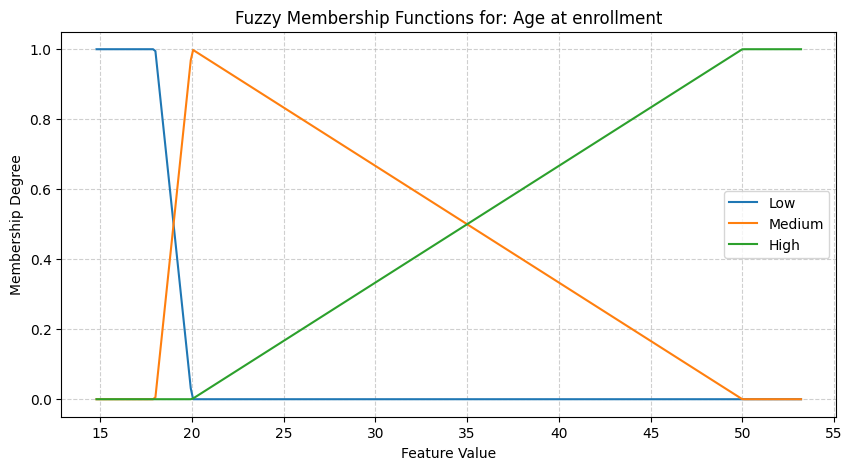

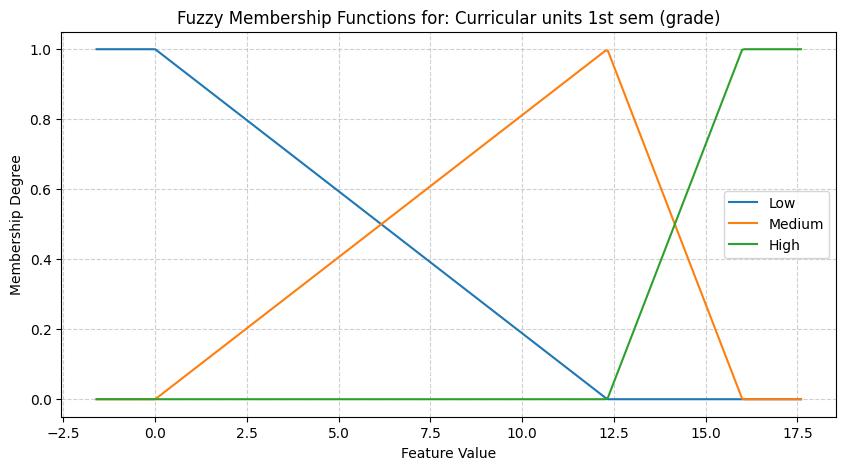

In [19]:
def plot_membership_functions(feature_name, params_dict):
    """
    Plots the triangular membership functions for a given continuous feature.
    """
    if feature_name not in params_dict:
        print(f"Error: Parameters for feature '{feature_name}' not found.")
        return

    feature_params = params_dict[feature_name]
    # Determine the plot range based on all points defined for this feature
    all_points = [p[i] for p in feature_params.values() for i in range(3)]
    min_val = min(all_points)
    max_val = max(all_points)

    # Handle cases where the range is zero
    if max_val == min_val:
        x_range = np.linspace(min_val - 0.5, max_val + 0.5, 100) # Small range around the single value
    else:
        padding = (max_val - min_val) * 0.1 # Add some padding around the edges
        x_range = np.linspace(min_val - padding, max_val + padding, 300)

    plt.figure(figsize=(10, 5))
    plt.title(f'Fuzzy Membership Functions for: {feature_name}')
    plt.xlabel('Feature Value')
    plt.ylabel('Membership Degree')

    for set_name, points in feature_params.items():
        membership_values = [triangular_mf(x, points[0], points[1], points[2]) for x in x_range]
        plt.plot(x_range, membership_values, label=set_name)

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim([-0.05, 1.05]) # Set Y-axis limits
    plt.show()

# --- Plotting for two continuous features ---
print("\n--- Plotting Membership Functions ---")
feature_to_plot_1 = 'Age at enrollment'
feature_to_plot_2 = 'Curricular units 1st sem (grade)'

if feature_to_plot_1 in mf_params_continuous:
    plot_membership_functions(feature_to_plot_1, mf_params_continuous)
else:
    print(f"Feature '{feature_to_plot_1}' not found among continuous features for plotting.")

if feature_to_plot_2 in mf_params_continuous:
     # For grades, we might want to consider only values > 0 or adjust the plot range
     # Here, we use parameters calculated from the full training data
    plot_membership_functions(feature_to_plot_2, mf_params_continuous)
else:
     print(f"Feature '{feature_to_plot_2}' not found among continuous features for plotting.")

## **Fuzzy Rule Extraction**

In [33]:
def wang_mendel_rule_extraction(X_train, y_train, mf_params_continuous, mf_params_categorical):
    """
    Extract fuzzy rules using Wang-Mendel method
    """
    rules = []
    rule_weights = []

    # For each training instance
    for idx in range(len(X_train)):
        antecedents = {}
        max_memberships = {}

        # For each feature
        for feature in X_train.columns:
            value = X_train.iloc[idx][feature]

            # Handle continuous features
            if feature in mf_params_continuous:
                max_membership = 0
                best_set = None

                # Find linguistic term with highest membership
                for set_name, points in mf_params_continuous[feature].items():
                    membership = triangular_mf(value, points[0], points[1], points[2])
                    if membership > max_membership:
                        max_membership = membership
                        best_set = set_name

                if best_set:
                    antecedents[feature] = best_set
                    max_memberships[feature] = max_membership

            # Handle categorical features
            elif feature in mf_params_categorical:
                antecedents[feature] = value
                max_memberships[feature] = 1.0

        # Get consequent (output class)
        consequent = y_train.iloc[idx]

        # Calculate rule weight as product of memberships
        rule_weight = np.prod(list(max_memberships.values()))

        # Create rule
        rule = (antecedents, consequent)

        # Check if rule already exists
        rule_exists = False
        for i, (existing_rule, existing_weight) in enumerate(zip(rules, rule_weights)):
            if existing_rule[0] == rule[0]:  # Same antecedents
                rule_exists = True
                # Keep rule with higher weight
                if rule_weight > existing_weight:
                    rules[i] = rule
                    rule_weights[i] = rule_weight
                break

        # Add new rule if it doesn't exist
        if not rule_exists:
            rules.append(rule)
            rule_weights.append(rule_weight)

    return rules, rule_weights

# Extract rules using Wang-Mendel method
print("\n--- Extracting Fuzzy Rules using Wang-Mendel Method ---")
rules, rule_weights = wang_mendel_rule_extraction(X_train, y_train, mf_params_continuous, categorical_unique_values)

filtered_rules, filtered_weights = zip(*[
    (rule, weight) for rule, weight in zip(rules, rule_weights) if weight >= 0.6
])

# Print some statistics about the rules
print(f"\nTotal number of rules extracted: {len(filtered_rules)}")

# Print a few example rules
print("\nExample rules:")
for i, (rule, weight) in enumerate(zip(filtered_rules[:5], filtered_weights[:5])):
      antecedents, consequent = rule
      print(f"\nRule {i+1} (weight: {weight:.3f}):")
      print("IF", end=" ")
      conditions = []
      for feature, value in antecedents.items():
          conditions.append(f"{feature} is {value}")
      print(" AND ".join(conditions))
      print(f"THEN Target is {consequent}")



--- Extracting Fuzzy Rules using Wang-Mendel Method ---

Total number of rules extracted: 229

Example rules:

Rule 1 (weight: 1.000):
IF Application mode is 1.0 AND Application order is Medium AND Course is 2.0 AND Previous qualification is 1.0 AND Mother's qualification is 13.0 AND Father's qualification is 14.0 AND Mother's occupation is 2.0 AND Father's occupation is 2.0 AND Debtor is 0.0 AND Tuition fees up to date is 1.0 AND Gender is 1.0 AND Scholarship holder is 0.0 AND Age at enrollment is Medium AND Curricular units 1st sem (enrolled) is Low AND Curricular units 1st sem (evaluations) is Low AND Curricular units 1st sem (approved) is Low AND Curricular units 1st sem (grade) is Low AND Curricular units 1st sem (without evaluations) is Low AND Curricular units 2nd sem (enrolled) is Low AND Curricular units 2nd sem (evaluations) is Low AND Curricular units 2nd sem (approved) is Low AND Curricular units 2nd sem (grade) is Low
THEN Target is Dropout

Rule 2 (weight: 1.000):
IF App

## **Fuzzy Rule Selection Using GA**

In [35]:
# Rule Selection using Genetic Algorithm
print("\n--- Rule Selection using Genetic Algorithm ---")

import numpy as np
!pip install deap
from deap import base, creator, tools, algorithms
import random

# 1. Encoding rules to binary for selection
def encode_rules_to_binary(rules, weights):
    """
    Encode rules as binary chromosomes where 1 means the rule is selected
    and 0 means the rule is not selected.
    """
    # Initial population will have all rules selected
    return [1] * len(rules)

# Function to apply selected rules for prediction
def apply_fuzzy_rules(X, selected_rules, selected_weights):
    """
    Apply the selected fuzzy rules to make predictions on the dataset X.
    """
    predictions = []

    for _, row in X.iterrows():
        # Store firing strengths for each class
        class_strengths = {}

        for rule, weight in zip(selected_rules, selected_weights):
            antecedents, consequent = rule

            # Calculate rule firing strength
            firing_strength = 1.0
            for feature, linguistic_value in antecedents.items():
                # For categorical features
                if feature in categorical_unique_values:
                    # Binary membership (1 if matches, 0 otherwise)
                    if row[feature] == linguistic_value:
                        membership = 1.0
                    else:
                        membership = 0.0
                # For continuous features
                else:
                    # Get membership functions for this feature
                    feature_mfs = mf_params_continuous[feature]

                    # Calculate membership degree
                    x = row[feature]
                    a, b, c = feature_mfs[linguistic_value]

                    # Triangular membership function
                    if x <= a or x >= c:
                        membership = 0.0
                    elif a < x <= b:
                        membership = (x - a) / (b - a)
                    else:  # b < x < c
                        membership = (c - x) / (c - b)

                # Update firing strength (using product t-norm)
                firing_strength *= membership

            # Weight the firing strength
            firing_strength *= weight

            # Aggregate rule outputs for the same class
            if consequent in class_strengths:
                class_strengths[consequent] = max(class_strengths[consequent], firing_strength)
            else:
                class_strengths[consequent] = firing_strength

        # If no rule fired with sufficient strength, use default class
        if not class_strengths or max(class_strengths.values()) < 0.1:
            predictions.append(y_train.mode()[0])  # Most common class in training set
        else:
            # Select class with highest firing strength
            predictions.append(max(class_strengths.items(), key=lambda x: x[1])[0])

    return np.array(predictions)

# 2. Define fitness function
def evaluate_ruleset(individual, rules, weights, X, y):
    """
    Fitness function that rewards accuracy and penalizes large rulesets.
    """
    # Select rules based on individual
    selected_rules = [rule for rule, selected in zip(rules, individual) if selected == 1]
    selected_weights = [weight for weight, selected in zip(weights, individual) if selected == 1]

    # If no rules selected, return worst fitness
    if not selected_rules:
        return 0.0,

    # Make predictions
    predictions = apply_fuzzy_rules(X, selected_rules, selected_weights)

    # Calculate accuracy
    accuracy = np.mean(predictions == y.values)

    # Penalize for number of rules (we want fewer rules)
    rule_penalty = len(selected_rules) / len(rules)

    # Final fitness: balance between accuracy and rule count
    fitness = accuracy * (1 - 0.3 * rule_penalty)

    return fitness,

# 3. Run GA for selecting best set of rules
def select_rules_with_ga(rules, weights, X_train, y_train, X_val, y_val):
    """
    Use genetic algorithm to select the optimal subset of rules.
    """
    # Create types for GA
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Register attribute generator
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Register individual and population creation
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.attr_bool, n=len(rules))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register evaluation function
    toolbox.register("evaluate", evaluate_ruleset, rules=rules, weights=weights,
                     X=X_val, y=y_val)

    # Register genetic operators
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Create initial population
    population = toolbox.population(n=50)

    # Add a fully selected individual to ensure we don't lose all rules
    all_selected = creator.Individual([1] * len(rules))
    population.append(all_selected)

    # Statistics setup
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Run the algorithm
    print("Running genetic algorithm for rule selection...")
    final_pop, logbook = algorithms.eaSimple(population, toolbox,
                                            cxpb=0.5,    # Crossover probability
                                            mutpb=0.2,   # Mutation probability
                                            ngen=30,     # Number of generations
                                            stats=stats,
                                            verbose=True)

    # Select the best individual
    best_individual = tools.selBest(final_pop, k=1)[0]

    # Get selected rules
    selected_rules = [rule for rule, selected in zip(rules, best_individual) if selected == 1]
    selected_weights = [weight for weight, selected in zip(weights, best_individual) if selected == 1]

    print(f"\nGA selected {len(selected_rules)} rules out of {len(rules)}")

    # Evaluate on training set
    train_predictions = apply_fuzzy_rules(X_train, selected_rules, selected_weights)
    train_accuracy = np.mean(train_predictions == y_train.values)
    print(f"Training accuracy with selected rules: {train_accuracy:.4f}")

    # Evaluate on validation set
    val_predictions = apply_fuzzy_rules(X_val, selected_rules, selected_weights)
    val_accuracy = np.mean(val_predictions == y_val.values)
    print(f"Validation accuracy with selected rules: {val_accuracy:.4f}")

    return selected_rules, selected_weights, best_individual

# Split data for validation
from sklearn.model_selection import train_test_split
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run GA for rule selection
selected_rules, selected_weights, best_individual = select_rules_with_ga(
    filtered_rules, filtered_weights, X_train_sub, y_train_sub, X_val, y_val
)

# Print some of the selected rules
print("\nExample selected rules:")
for i, (rule, weight) in enumerate(zip(selected_rules[:5], selected_weights[:5])):
    antecedents, consequent = rule
    print(f"\nSelected Rule {i+1} (weight: {weight:.3f}):")
    print("IF", end=" ")
    conditions = []
    for feature, value in antecedents.items():
        conditions.append(f"{feature} is {value}")
    print(" AND ".join(conditions))
    print(f"THEN Target is {consequent}")


--- Rule Selection using Genetic Algorithm ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.9 MB/s eta 0:00:00
Running genetic algorithm for rule selection...
gen	nevals	avg     	min     	max     
0  	51    	0.415381	0.343079	0.425906
1  	27    	0.420795	0.411781	0.42719 
2  	21    	0.42262 	0.416917	0.42719 
3  	33    	0.424635	0.418201	0.431043
4  	28    	0.426259	0.417559	0.431685
5  	33    	0.428487	0.422696	0.434253
6  	33    	0.430212	0.426548	0.434895
7  	32    	0.432075	0.422054	0.437463
8  	24    	0.433926	0.428474	0.440032
9  	34    	0.43531 	0.428474	0.441316
10 	28    	0.437249	0.432327	0.441316
11 	21    	0.43881 	0.433611	0.444526
12 	22    	0.439792	0.433611	0.444526
13 	27    	0.440762	0.435537	0.444526
14 	32    	0.44221 	0.438747	0.44581 
15 	28    	0.443129	0.437463	0.446452
16 	34    	0.444148	0.438105	0.448378
17 	30    	0.445017	0.43939 	0.448378
18 	33    	0.445823	0.437463	0.449021
19 	33    	0.446767	0.437463	0.450305
20 	18    	0.447925	0.4400

### **Saving Selected Rules**

In [ ]:
import pickle

print("\n--- Saving Selected Rules and Weights ---")
rules_data = {
    'selected_rules': selected_rules,
    'selected_weights': selected_weights,
    'best_individual': best_individual
}

# Save to a pickle file
with open('selected_fuzzy_rules.pkl', 'wb') as f:
    pickle.dump(rules_data, f)
print("Rules saved to 'selected_fuzzy_rules.pkl'")

### **Loading Selected Rules**

In [39]:
import pickle

# Function to load the saved rules
def load_saved_rules(filename='selected_fuzzy_rules.pkl'):
    try:
        with open(filename, 'rb') as f:
            rules_data = pickle.load(f)
        print(f"Successfully loaded {len(rules_data['selected_rules'])} rules from {filename}")
        return rules_data['selected_rules'], rules_data['selected_weights'], rules_data['best_individual']
    except FileNotFoundError:
        print(f"File {filename} not found. Please run rule extraction first.")
        return None, None, None
    except Exception as e:
        print(f"Error loading rules: {e}")
        return None, None, None

# Example of how to load the rules in future runs:
selected_rules, selected_weights, best_individual = load_saved_rules()


--- Saving Selected Rules and Weights ---
Rules saved to 'selected_fuzzy_rules.pkl'
